# Random 3D Data Generator
This code created by Zachary Neronha to generate synthetic 3D data for topological data analysis 

In [160]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.cm as cm


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

from __future__ import division
init_notebook_mode(connected=True)

## 1.1 Generate random points on a sphere
Points will be randomly distributed a certain small distance off the surface of the sphere

In [164]:
r = 1
samplepts = 200
theta = 2*np.pi*np.random.rand(samplepts)
pa = np.random.rand(samplepts)*2-1
phi = np.arccos(pa)

#convert to cartesian points on a circle
x = r*np.cos(theta)*np.sin(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(phi)

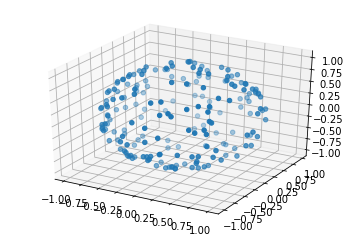

In [156]:
#plot for confirmation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)



### Jay plotting code 3D

In [165]:
plt_data = []
  

trace = go.Scatter3d(
            name = 'SyntheticSphere',
            x = x,
            y = y,
            z = z,
            mode = 'markers',
            marker = dict(
                color = 1,
                size = 8,
                symbol = 'circle',
                line = dict(
                    color = 'rgb(180, 180, 180)',
                    width = 1.0
                ),
                opacity = 0.4
            )
        )

plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

In [51]:
#Compile data and export data points as csv
savemat1 = np.zeros((samplepts,3))
savemat1[:,0] = x
savemat1[:,1] = y
savemat1[:,2] = z

np.savetxt("Practice3DTDA_Sph.csv", savemat1, delimiter=",")

## 1.3 Multiple Spheres
Generate multiple spheres, and concatenate the data

In [151]:
r1 = 0.2
r2 = 1
r3 = 0.7
samplepts = 100
theta = 2*np.pi*np.random.rand(samplepts)
pa = np.random.rand(samplepts)*2-1
phi = np.arccos(pa)

# first sphere
x1 = r1*np.cos(theta)*np.sin(phi)
y1 = r1*np.sin(theta)*np.sin(phi)
z1 = r1*np.cos(phi)

# now for the second sphere
x2 = r2*np.cos(theta)*np.sin(phi)+1
y2 = r2*np.sin(theta)*np.sin(phi)-2
z2 = .5*r2*np.cos(phi)

# now for the third sphere
x3 = r3*np.cos(theta)*np.sin(phi)-2
y3 = r3*np.sin(theta)*np.sin(phi)-2
z3 = r3*np.cos(phi)-2

In [153]:
#Compile data and export data points as csv
savemat2 = np.zeros((samplepts*3,3))
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
z = np.concatenate((z1,z2,z3),axis=0)
savemat2[:,0] = x
savemat2[:,1] = y
savemat2[:,2] = z

np.savetxt("Practice3DTDA_Sph3.csv", savemat2, delimiter=",")

## 1.2 Generate two concentric spheres and export together

In [198]:
%time
r1 = 0.2
r2 = 1
samplepts1 = 50
theta1 = 2*np.pi*np.random.rand(samplepts1)
pa1 = np.random.rand(samplepts1)*2-1
phi1 = np.arccos(pa1)

#convert to cartesian points on a circle
x1 = r1*np.cos(theta1)*np.sin(phi1)
y1 = r1*np.sin(theta1)*np.sin(phi1)
z1 = r1*np.cos(phi1)

samplepts2 = 300
theta2 = 2*np.pi*np.random.rand(samplepts2)
pa2 = np.random.rand(samplepts2)*2-1
phi2 = np.arccos(pa2)

# now for the second sphere
x2 = r2*np.cos(theta2)*np.sin(phi2)
y2 = r2*np.sin(theta2)*np.sin(phi2)
z2 = r2*np.cos(phi2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [191]:
#Compile data and export data points as csv
savemat2 = np.zeros((samplepts1+samplepts2,3))
x = np.concatenate((x1,x2),axis=0)
y = np.concatenate((y1,y2),axis=0)
z = np.concatenate((z1,z2),axis=0)
savemat2[:,0] = x
savemat2[:,1] = y
savemat2[:,2] = z

np.savetxt("Practice3DTDA_Sph2.csv", savemat2, delimiter=",")

In [192]:
x_all = [x1,x2]
y_all = [y1,y2]
z_all = [z1,z2]
len(x_all)

2

In [194]:

plt_data = []
for i in range(len(x_all)):  

    trace = go.Scatter3d(
                name = 'SyntheticSphere'+repr(i),
                x = x_all[i],
                y = y_all[i],
                z = z_all[i],
                mode = 'markers',
                marker = dict(
                    color = i,
                    size = 8,
                    symbol = 'circle',
                    line = dict(
                        color = 'rgb(180, 180, 180)',
                        width = 1.0
                    ),
                    opacity = 0.4
                )
            )

    plt_data.append(trace)

layout = go.Layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

fig = go.Figure(data=plt_data, layout=layout)

iplot(fig)    

# 1.3 Torus
Generate random points on a torus according to the equations with random parameters u and v
$$ x = (c + a \cos(v)) \cos(u)$$
$$y = (c + a \cos(v)) \sin(u)$$
$$z = a \sin(v)$$

In [149]:
#Compile random data parameters u and v
sp = 300
c = .5
a = .2

u = np.random.rand(sp)*2*np.pi
v = np.random.rand(sp)*2*np.pi



#generate x y and z data points
x = (c+a*np.cos(v))*np.cos(u)
y = (c+a*np.cos(v))*np.sin(u)
z = a*np.sin(v)

np.savetxt("Practice3DTDA_Torus.csv", savemat2, delimiter=",")

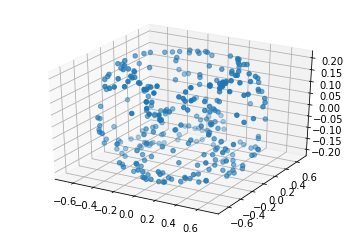

In [148]:
#plot for confirmation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)